In [69]:
from google.cloud import bigquery
import pandas as pd

from google.oauth2 import service_account

key_path = "crunchbase-startups-b791b011b22c.json"

credentials = service_account.Credentials.from_service_account_file(
key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

sql = """
    SELECT *
    FROM `crunchbase-startups.startups.join_table`
"""

df = client.query(sql).to_dataframe()

In [70]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [71]:
features = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'lifetime', \
            'num_missing_features', 'has_website', 'has_twitter', 'description_length', 'overview_length', \
            'overview_class_field1', 'overview_class_field2', 'overview_class_field3', 'overview_class_field4', 'investment_period', \
            'funding_period', 'milestone_period', 'investment_rate', 'funding_rate', 'milestone_rate', \
            'inverse_dt_since_last_investment', 'inverse_dt_since_last_funding', 'inverse_dt_since_last_milestone', 'inverse_data_creation_gap', 'update_gap', \
            'category_encoded_op', 'category_encoded_ac', 'category_encoded_ip', 'category_encoded_cl', 'country_encoded_op', \
            'country_encoded_ac', 'country_encoded_ip', 'country_encoded_cl', 'state_encoded_op', 'state_encoded_ac', \
            'state_encoded_ip', 'state_encoded_cl']

In [72]:
labels = ['status_operating', 'status_acquired', 'status_ipo', 'status_closed']

X = df[features]
Y = df[labels]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [74]:
Y_pred = rf.predict(X_test)

accuracy = accuracy_score(np.array(Y_test).astype(float), Y_pred)
precision = precision_score(np.array(Y_test).astype(float), Y_pred, average=None)
recall = recall_score(np.array(Y_test).astype(float), Y_pred, average=None)
f1 = f1_score(np.array(Y_test).astype(float), Y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F-1 Score:", f1)

Accuracy: 0.9414024731565823
Precision Score: [0.95357414 0.61465721 0.6875     0.94405594]
Recall Score: [0.99175757 0.14084507 0.04845815 0.57692308]
F-1 Score: [0.97229112 0.22917585 0.09053498 0.71618037]


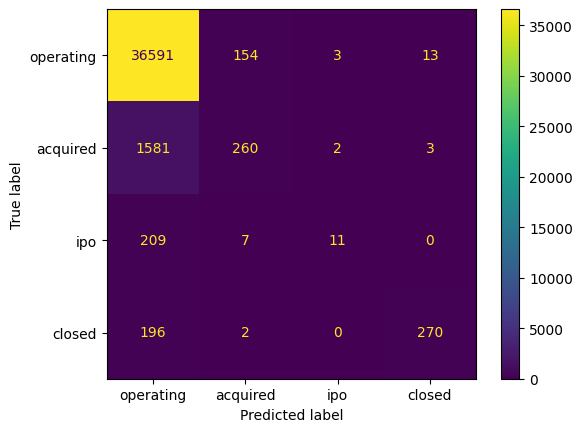

In [75]:
cm = confusion_matrix(np.array(Y_test).argmax(axis=1), Y_pred.argmax(axis=1))

ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['operating', 'acquired', 'ipo', 'closed']).plot()

In [76]:
from sklearn.preprocessing import OrdinalEncoder

X = df[features]
# Encode y to numeric
y_encoded = OrdinalEncoder().fit_transform(df[["status"]])
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)
X_test = X_test.astype(float)

In [77]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=200, 
                                   objective='multi:softprob', 
                                   num_class=4, 
                                   tree_method='hist', device='cuda', 
                                   eta=0.1, 
                                   early_stopping_rounds=100, 
                                   enable_categorical=True)
xgb_classifier.fit(X_train, 
                   y_train, 
                   eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.21818
[1]	validation_0-mlogloss:1.08304
[2]	validation_0-mlogloss:0.97096
[3]	validation_0-mlogloss:0.87620


[10:39:36] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


[4]	validation_0-mlogloss:0.79536
[5]	validation_0-mlogloss:0.72550
[6]	validation_0-mlogloss:0.66477
[7]	validation_0-mlogloss:0.61164
[8]	validation_0-mlogloss:0.56493
[9]	validation_0-mlogloss:0.52352
[10]	validation_0-mlogloss:0.48687
[11]	validation_0-mlogloss:0.45449
[12]	validation_0-mlogloss:0.42568
[13]	validation_0-mlogloss:0.40006
[14]	validation_0-mlogloss:0.37716
[15]	validation_0-mlogloss:0.35673
[16]	validation_0-mlogloss:0.33854
[17]	validation_0-mlogloss:0.32235
[18]	validation_0-mlogloss:0.30770
[19]	validation_0-mlogloss:0.29465
[20]	validation_0-mlogloss:0.28286
[21]	validation_0-mlogloss:0.27214
[22]	validation_0-mlogloss:0.26254
[23]	validation_0-mlogloss:0.25397
[24]	validation_0-mlogloss:0.24608
[25]	validation_0-mlogloss:0.23900
[26]	validation_0-mlogloss:0.23269
[27]	validation_0-mlogloss:0.22704
[28]	validation_0-mlogloss:0.22174
[29]	validation_0-mlogloss:0.21708
[30]	validation_0-mlogloss:0.21280
[31]	validation_0-mlogloss:0.20883
[32]	validation_0-mlogloss

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=100,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=4, ...)

Accuracy: 0.9480942445677065
Precision Score: [0.6402027  0.93398058 0.56790123 0.95387522]
Recall Score: [0.2002113  0.84683099 0.19409283 0.99322478]
F-1 Score: [0.30503018 0.88827331 0.28930818 0.97315239]


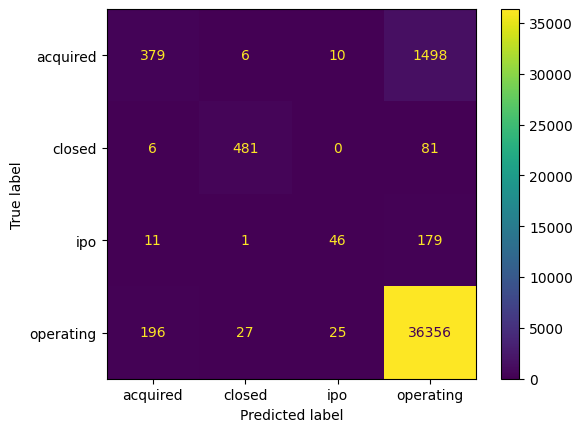

In [78]:
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F-1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['acquired', 'closed', 'ipo', 'operating']).plot()

In [79]:
import shap

explainer = shap.TreeExplainer(xgb_classifier, X_test)
shap_values = explainer.shap_values(X_test.sample(n=2000))
# xgb.plot_importance(xgb_classifier)

[10:39:47] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


100%|===================| 7966/8000 [02:46<00:00]        

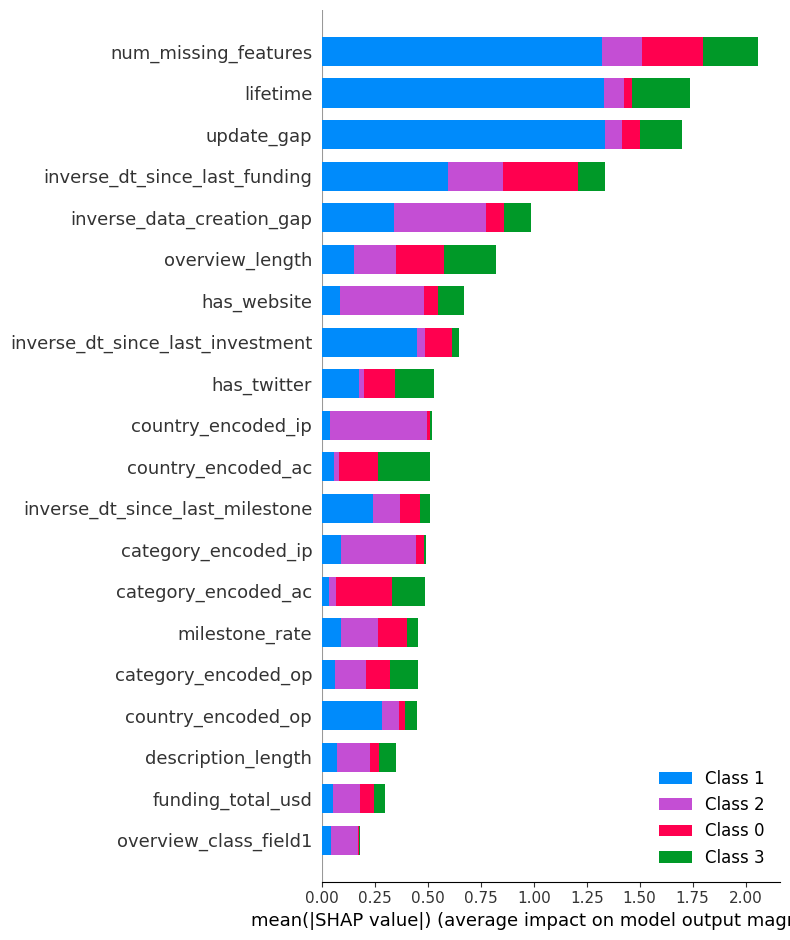

In [82]:
# shap.plot.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0][:1000], X_test)
shap.summary_plot(shap_values, X_test)



In [ ]:
param_dist = {'n_estimators': np.arange(50,500,50),
              'max_depth': [None]}
# Create a random forest classifier
rf = RandomForestClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, 
                           param_grid = param_dist,
                           cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

In [43]:
# best_rf = grid_search.best_estimator_
# print('Best hyperparameters:',  grid_search.best_params_)
from imblearn.ensemble import BalancedRandomForestClassifier

best_rf = BalancedRandomForestClassifier(n_estimators=200,
                                         max_depth=100,
                                         sampling_strategy='all',
                                         replacement=True)
best_rf.fit(X_train, Y_train)

best_y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(np.array(Y_test).astype(float), best_y_pred)
precision = precision_score(np.array(Y_test).astype(float), best_y_pred, average=None)
recall = recall_score(np.array(Y_test).astype(float), best_y_pred, average=None)
f1 = f1_score(np.array(Y_test).astype(float), best_y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F-1 Score:", f1)

Accuracy: 0.6613403898020457
Precision Score: [0.99350201 0.22493603 0.11906615 0.45044053]
Recall Score: [0.66537018 0.53278237 0.65948276 0.83640082]
F-1 Score: [0.79698317 0.31632319 0.20171391 0.58554044]
